In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import random
import itertools
import math

In [2]:
# settings
delta = 0.1
size = (4,4)
length = 4

def gen_rectangle(s, c):
    yield (0+c*s[0],0), (0+c*s[0],s[1]), (s[0]+c*s[0],s[1]), (s[0]+c*s[0],0), (0+c*s[0],0)
    
def gen_triangle(s, c):
    yield (0+c*s[0],0), (s[0]/2+c*s[0],s[1]), (s[0]+c*s[0],0), (0+c*s[0],0)
    
def gen_hexagon(s, c): 
    yield (0+c*s[0],s[0]/2), (s[0]/4+c*s[0],s[0]), (s[0]*3/4+c*s[0],s[0]), (s[0]+c*s[0],s[0]/2), (s[0]*3/4+c*s[0],0), (s[0]/4+c*s[0],0), (0+c*s[0],s[0]/2)

def gen_line(s, c):
    yield (0+c*s[0],0), (s[0]+c*s[0],0)
    
fnc = [gen_rectangle, gen_triangle, gen_hexagon, gen_line]
    
def generate(n, s, t=-1):
    data = []
    for i in range(n):
        if 0 <= t <= 3:
            r = tuple(fnc[t](s, i+delta*i))[0]
        else:
            r = tuple(fnc[random.randint(0,2)](s, i+delta*i))[0]
        data.append((tuple(j[0] for j in r), tuple(j[1] for j in r)))
    return data

def draw(data, r=0):
    rot = matplotlib.transforms.Affine2D().rotate_deg(r)
    base = plt.gca().transData
    for i in data:
        ax.plot(*i, transform=rot+base)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

def tr_translate(data, p):
    data = [list(i for i in data[0]), list(i for i in data[1])]
    for j in range(len(data[0])):
        data[0][j] += p[0]
    for j in range(len(data[1])):
        data[1][j] += p[1]
    return data

def tr_symmetry(data, n, w):
    n_max = (n * w * (1+delta) - delta) * 2
    return [list(map(lambda x: n_max-x, data[0])), data[1]]

def tr_rotate(f, deg):
    def rot(xy, radians):
        x, y = xy
        c, s = np.cos(radians), np.sin(radians)
        j = np.matrix([[c, s], [-s, c]])
        m = np.dot(j, [x, y])

        return float(m.T[0]), float(m.T[1])
    
    data, r = list(), list()
    for x,y in zip(f[0], f[1]):
        r.append(rot((x,y), math.radians(-deg)))
    data.append((tuple(j[0] for j in r), tuple(j[1] for j in r)))
    
    return data[0]

def tr_homothety(data, n):
    data = [list(i for i in data[0]), list(i for i in data[1])]
    for i in range(len(data)):
        for j in range(len(data[i])):
            data[i][j] *= n
    return data

def flt_angle_point(data, point_raw):
    a = set()
    points = [tuple(map(float, i)) for i in point_raw]
    for i in range(len(data)):
        for j in range(len(data[i][0])):
            if (float(data[i][0][j]), float(data[i][1][j])) in points:
                a.add(i)
                break
    return list(a)

def flt_short_side(data, filter_dist):
    a = set()
    for i in range(len(data)):
        for j in range(len(data[i][0])):
            if j == 0:
                continue
                
            dist = math.hypot(data[i][0][j]-data[i][0][j-1], data[i][1][j]-data[i][1][j-1])
            if dist <= filter_dist:
                a.add(i)
    return list(a)

# 2.1 gen_rectangle

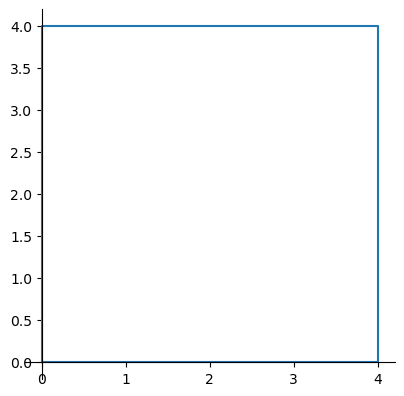

In [3]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(generate(1, size, 0))

# 2.2 gen_triangle

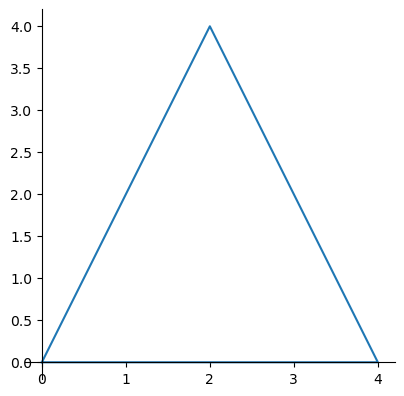

In [4]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(generate(1, size, 1))

# 2.3 gen_hexagon

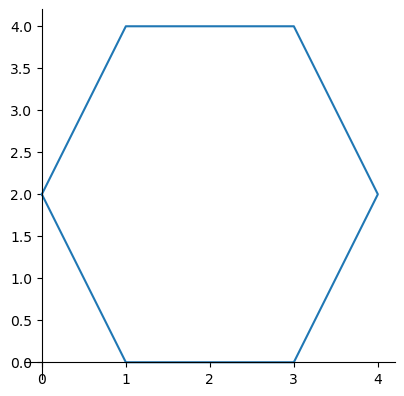

In [5]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(generate(1, size, 2))

# 2.4

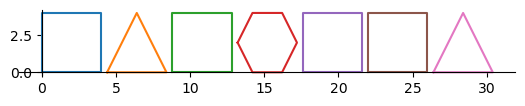

In [6]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(generate(7, size))

# 3.1 tr_translate

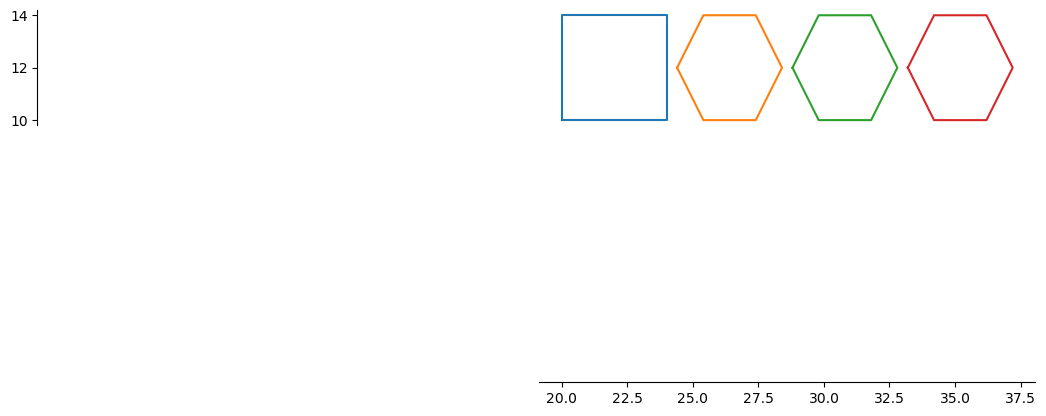

In [7]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(list(map(lambda x: tr_translate(x, (20, 10)), generate(length, size))))

# 3.2 tr_rotate

[None, None, None, None, None]

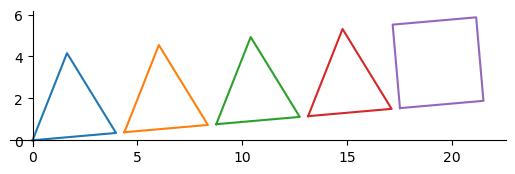

In [8]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

list(map(lambda x: draw([x], 5), generate(5, size)))

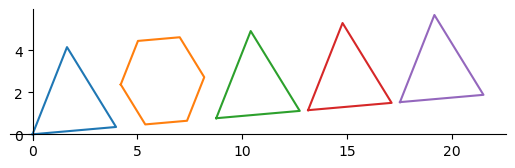

In [9]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(list(map(lambda x: tr_rotate(x, 5), generate(5, size))))

# 3.3 tr_symmetry

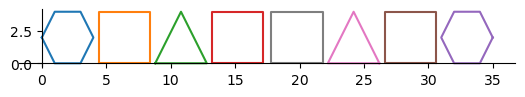

In [10]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

a = generate(length, size)
b = list(map(lambda x: tr_symmetry(x, length, size[0]), a))
draw(a)
draw(b)

# 3.4 tr_homothety

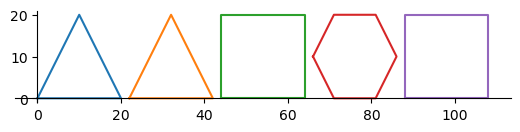

In [36]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(list(map(lambda x: tr_homothety(x, 5), generate(5, size))))

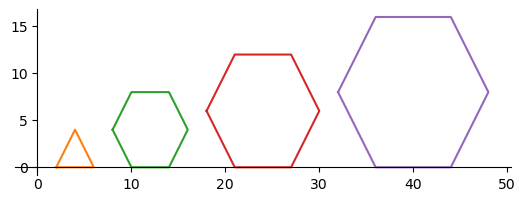

In [45]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

delta = -0.5
a = []
for i,j in zip(generate(5, size), range(5)):
    a.append(tr_homothety(i, j))
    
draw(a)

# 4.1

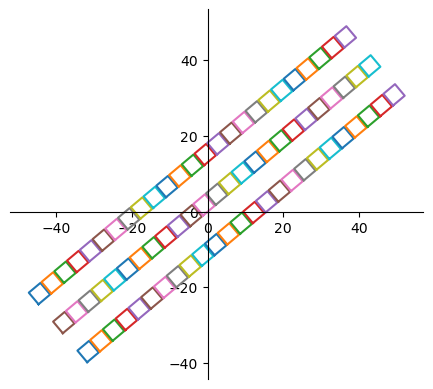

In [12]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(list(map(lambda x: tr_translate(x, (-50, 10)), generate(25, size, 0))), 40)
draw(list(map(lambda x: tr_translate(x, (-50, 0)), generate(25, size, 0))), 40)
draw(list(map(lambda x: tr_translate(x, (-50, -10)), generate(25, size, 0))), 40)

# 4.2

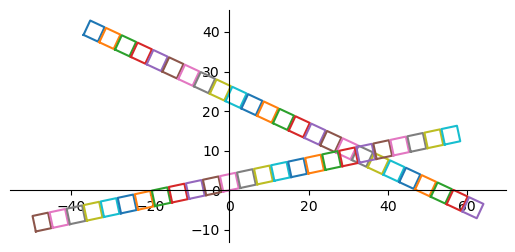

In [13]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(list(map(lambda x: tr_translate(x, (-50, 20)), generate(25, size, 0))), -25)
draw(list(map(lambda x: tr_translate(x, (-50, 0)), generate(25, size, 0))), 12)

# 4.3

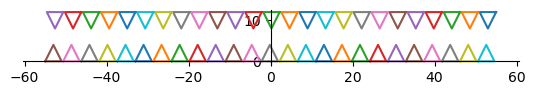

In [14]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

draw(list(map(lambda x: tr_translate(x, (-55, -12)), generate(25, size, 1))), -180)
draw(list(map(lambda x: tr_translate(x, (-55, 0)), generate(25, size, 1))))

# 4.4

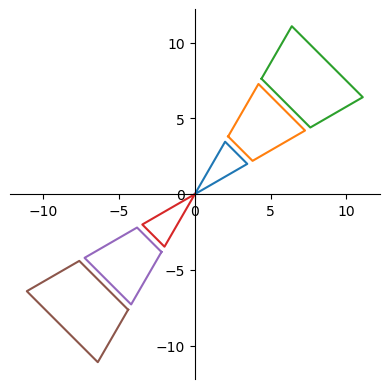

In [15]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

offset = 45
deg = 15
num = 3

d1 = list(map(lambda x: tr_rotate(x, offset+deg), generate(num, size, 3)))
d2 = list(map(lambda x: tr_rotate(x, offset-deg), generate(num, size, 3)))

dr = []
for i in range(len(d1)):
    dr.append([[d1[i][0][0], d1[i][0][1], d2[i][0][1], d2[i][0][0], d1[i][0][0]],[d1[i][1][0], d1[i][1][1], d2[i][1][1], d2[i][1][0], d1[i][1][0]]])

draw(dr)
draw(dr, 180)

# 5.2 flt_angle_point

All: 3, Filtered: 2


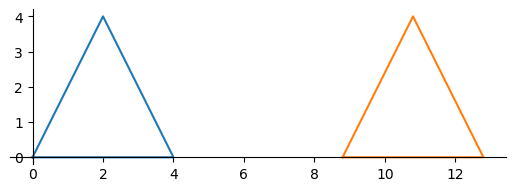

In [16]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

points = [(0, 0), (10.8,4)]

gen = np.array(generate(3, size, 1))
filtered = flt_angle_point(gen, points)

print(f'All: {len(gen)}, Filtered: {len(filtered)}')
draw(gen[filtered])

# 5.4 flt_short_side

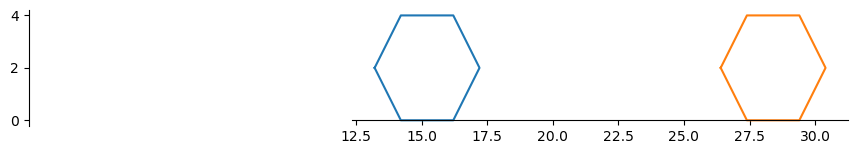

In [17]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

dist = 3.5

gen = np.array(generate(10, size), dtype=object)
filtered = flt_short_side(gen, dist)

draw(gen[filtered])

# 6.1

Figures num to show: [2, 0, 1]
Percentage of shown figures: 6.666666666666667% or 3/45


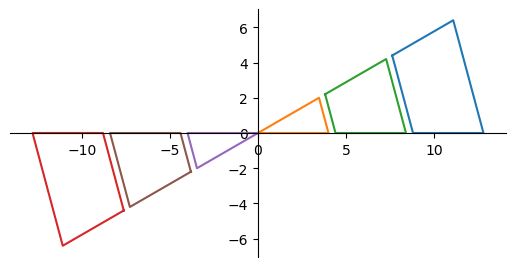

In [18]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')

offset = 15
deg = 15
num = 45

d1 = list(map(lambda x: tr_rotate(x, offset+deg), generate(num, size, 3)))
d2 = list(map(lambda x: tr_rotate(x, offset-deg), generate(num, size, 3)))

dr = []
for i in range(len(d1)):
    dr.append([[d1[i][0][0], d1[i][0][1], d2[i][0][1], d2[i][0][0], d1[i][0][0]],[d1[i][1][0], d1[i][1][1], d2[i][1][1], d2[i][1][0], d1[i][1][0]]])


filtered1 = flt_angle_point(dr, [(8.8, 0)])
filtered2 = flt_short_side(dr, 3.9)

print(f'Figures num to show: {[*filtered1, *filtered2]}\nPercentage of shown figures: {len([*filtered1, *filtered2])/num*100}% or {len([*filtered1, *filtered2])}/{num}')

dr2 = np.array(dr, dtype=object)[[*filtered1, *filtered2]]

draw(dr2)
draw(dr2, 180)